In [156]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [27]:
import sklearn

In [28]:
from sklearn.datasets import load_boston
boston=load_boston()


In [29]:
##Let's see what's in the list
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR'])


In [30]:
print(boston.feature_names)
print(boston.data.shape)

print(boston.DESCR)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
(506, 13)
Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX   

In [31]:
boston_df=pd.DataFrame(boston.data)
boston_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [32]:
boston_df.columns = boston.feature_names
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [33]:
boston_df['MEDV'] = boston.target
print(boston_df.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


In [34]:
x1=pd.DataFrame(boston_df['LSTAT'])
y1=pd.DataFrame(boston_df['MEDV'])

In [35]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
l=lm.fit(x1, y1)

In [36]:
y_predict=pd.DataFrame([5,10,15])

In [37]:
lm.predict(y_predict)

array([[29.80359411],
       [25.05334734],
       [20.30310057]])

In [38]:
##see coefficent of x
coef=lm.coef_

In [39]:
##see intercept
itercept=lm.intercept_

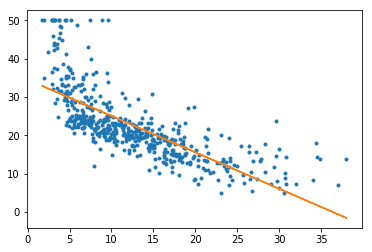

In [40]:
##plot least squares regression line
from scipy import stats
line = coef*x1+itercept
plt.plot(x1,y1,'.',x1,line)

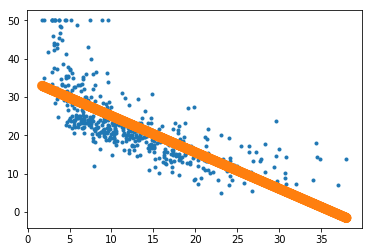

In [41]:
##changing width of line
plt.plot(x1,y1,'.',x1,line,linewidth=10)

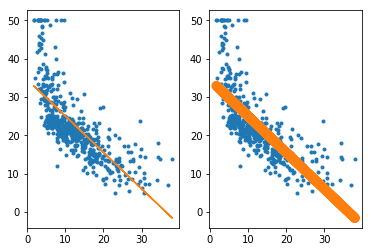

In [42]:
##to view multiple plots by splitting screen into panels..
plt.subplot(1,2,1)
plt.plot(x1,y1,'.',x1,line)
plt.subplot(1,2,2)
plt.plot(x1,y1,'.',x1,line,linewidth=10)
plt.show()

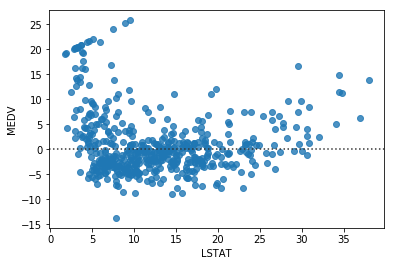

In [43]:
##to plot a residual plot
sns.residplot('LSTAT','MEDV',data=boston_df,robust=True)
##robust makes the residual plot to plot residuals by fitting a linear regression model.

In [166]:
##library for rsquared value
import statsmodels.api as sm
lm = smf.ols('MEDV ~ LSTAT',data = boston_df).fit()
print("The rsquared values is " + str(lm.rsquared))

The rsquared values is 0.5441462975864797


## Multivariate LinReg

In [45]:
x2=pd.DataFrame(boston_df[['LSTAT','AGE']])

In [79]:
y2 = y1

In [80]:
lm1 = LinearRegression()
l1=lm1.fit(x2, y2)

/home/kartik/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


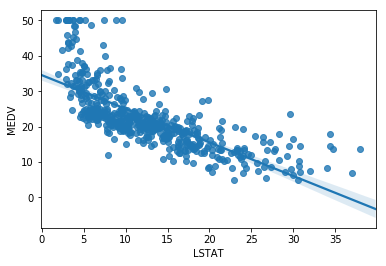

In [81]:
sns.regplot('LSTAT','MEDV',data=boston_df)

In [68]:
##to find VIF
r_square=lm1.score(x2,y1)
print('rsquare is'+str(r_square))
VIF=1/(1-r_square)
print('VIF is'+str(VIF))

rsquare is0.5512689379421003
VIF is2.2285063026703735


## Interaction terms

In [73]:
from sklearn.preprocessing import PolynomialFeatures 

In [97]:
X =pd.DataFrame(boston_df[['LSTAT','AGE']])
y3 = y1

In [98]:
poly = PolynomialFeatures(interaction_only=True,include_bias = False)
X = poly.fit_transform(X)


In [99]:
lm3 = LinearRegression()
lm3.fit(X, y3)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [100]:
print (lm3.intercept_, lm3.coef_)

[36.08853593] [[-1.39211684e+00 -7.20859509e-04  4.15595185e-03]]


## Non-linear Transformations

In [189]:
lm_fit = smf.ols('MEDV ~ LSTAT', boston_df).fit()
lm_fit2 = smf.ols('MEDV ~ LSTAT + I(LSTAT**2)', boston_df).fit()

In [190]:
lm_fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     448.5
Date:                Fri, 01 Mar 2019   Prob (F-statistic):          1.56e-112
Time:                        22:22:16   Log-Likelihood:                -1581.3
No. Observations:                 506   AIC:                             3169.
Df Residuals:                     503   BIC:                             3181.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        42.8620      0.872     49.149      0.000      41.149      44.575
LSTAT            -2.3328      0.124    -18.843      0.000      -2.576      -2.090
I(LSTAT ** 2)     0.0435      0.004     11.628      0.000       0.036       0.051
==============================================================================
Omnibus:                      107.006   Durbin-Watson:                   0.921
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              228.388
Skew:                           1.128   Prob(JB):                     2.55e-50
Kurtosis:                       5.397   Cond. No.                     1.13e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [191]:
from statsmodels.stats.api import anova_lm

In [192]:
anova_lm(lm_fit, lm_fit2)

/home/kartik/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/home/kartik/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/home/kartik/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,504.0,19472.381418,0.0,NaN,NaN,NaN
1,503.0,15347.243158,1.0,4125.13826,135.199822,7.630116e-28


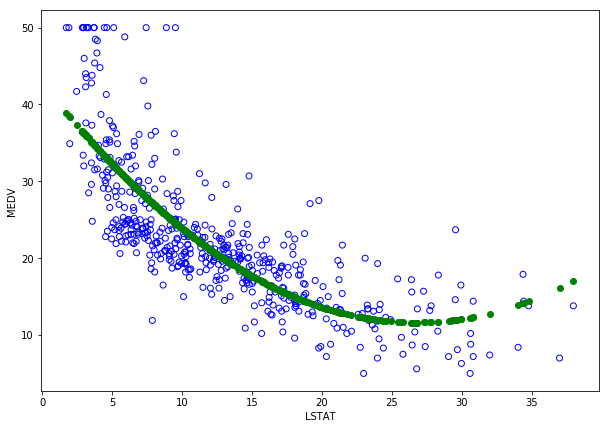

In [197]:
fig, ax = plt.subplots(figsize=(10,7))


ax.scatter(boston_df.LSTAT, boston_df.MEDV, facecolors='none', edgecolors='b');
ax.plot(boston_df.LSTAT, lm_fit2.fittedvalues, 'g', marker='o',linestyle='none');

plt.xlabel('LSTAT');
plt.ylabel('MEDV');

In [205]:
poly = PolynomialFeatures(5,include_bias = False)
X1 = poly.fit_transform(np.array(boston_df.LSTAT).reshape(-1,1))

In [207]:
poly5_fit = smf.ols('MEDV ~ poly.fit_transform(np.array(LSTAT).reshape(-1,1))', boston_df).fit()

In [208]:
poly5_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     214.2
Date:                Fri, 01 Mar 2019   Prob (F-statistic):          8.73e-122
Time:                        22:40:15   Log-Likelihood:                -1550.6
No. Observations:                 506   AIC:                             3113.
Df Residuals:                     500   BIC:                             3139.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=========================================================================================================================
                                                            coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
Intercept                                                67.6997      3.604     18.783      0.000      60.618      74.781
poly.fit_transform(np.array(LSTAT).reshape(-1, 1))[0]   -11.9911      1.526     -7.859      0.000     -14.989      -8.994
poly.fit_transform(np.array(LSTAT).reshape(-1, 1))[1]     1.2728      0.223      5.703      0.000       0.834       1.711
poly.fit_transform(np.array(LSTAT).reshape(-1, 1))[2]    -0.0683      0.014     -4.747      0.000      -0.097      -0.040
poly.fit_transform(np.array(LSTAT).reshape(-1, 1))[3]     0.0017      0.000      4.143      0.000       0.001       0.003
poly.fit_transform(np.array(LSTAT).reshape(-1, 1))[4] -1.632e-05   4.42e-06     -3.692      0.000    -2.5e-05   -7.63e-06
==============================================================================
Omnibus:                      144.085   Durbin-Watson:                   0.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              494.545
Skew:                           1.292   Prob(JB):                    4.08e-108
Kurtosis:                       7.096   Cond. No.                     1.37e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.37e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [209]:
log_fit = smf.ols('MEDV ~ np.log(RM)', boston_df).fit()

In [210]:
log_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.436
Model:                            OLS   Adj. R-squared:                  0.435
Method:                 Least Squares   F-statistic:                     389.3
Date:                Fri, 01 Mar 2019   Prob (F-statistic):           1.22e-64
Time:                        22:45:41   Log-Likelihood:                -1695.4
No. Observations:                 506   AIC:                             3395.
Df Residuals:                     504   BIC:                             3403.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -76.4878      5.028    -15.213      0.000     -86.366     -66.610
np.log(RM)    54.0546      2.739     19.732      0.000      48.672      59.437
==============================================================================
Omnibus:                      117.102   Durbin-Watson:                   0.681
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              584.336
Skew:                           0.916   Prob(JB):                    1.30e-127
Kurtosis:                       7.936   Cond. No.                         38.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Qualitative Predictors

## Defining functions

In [211]:
def load_libraries():
    import pandas as pd 
    import numpy as np
    print('Pandas and Numpy have been loaded.')

In [212]:
load_libraries()

Pandas and Numpy have been loaded.
